# The Sparks Foundation - Internship
Data Science and Business Analytics
# Prediction using Decision Tree Algorithm
Create a Decision Tree clasifier and visualize it graphically

Data can be found at http://bit.ly/3kXTdox


## Author - Tanmay Singh

In [1]:
# Importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets

In [2]:
# Loading the required dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

x = iris.data[:, :]
y = iris.target

data['Species'] = iris['target']
data['Species'] = data['Species'].apply(lambda x: iris['target_names'][x])

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


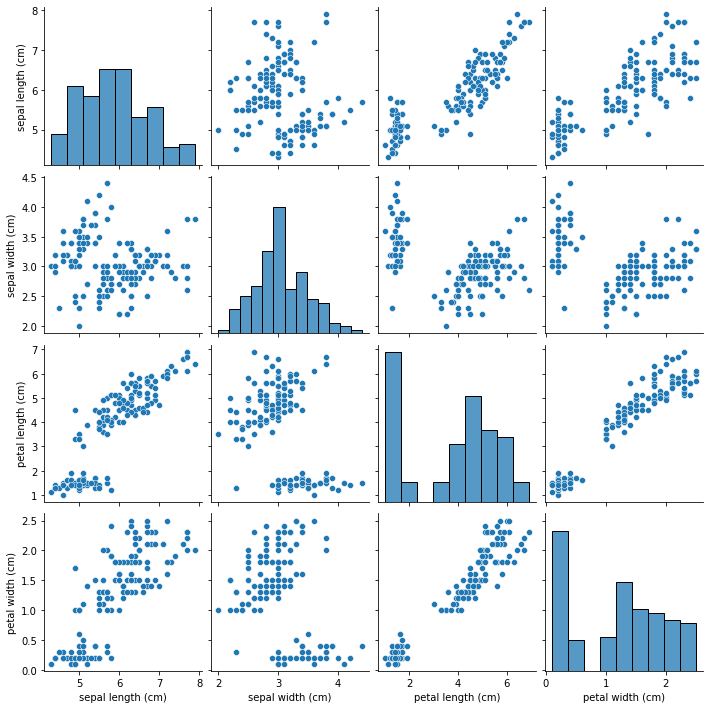

In [4]:
# Data Visualization
sns.pairplot(data)

In [5]:
# Training model using the Decision Tree Algorithm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
# Making some predictions 
y_pred = dtc.predict(x_test)

# Comparing Actual value vs Predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2


In [7]:
# Checking the accuracy of our model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(f'Accuracy score = {score}')

Accuracy score = 1.0


The accuracy of this model is 100% since I have taken all the 4 features of the iris dataset for creating the decision tree model.



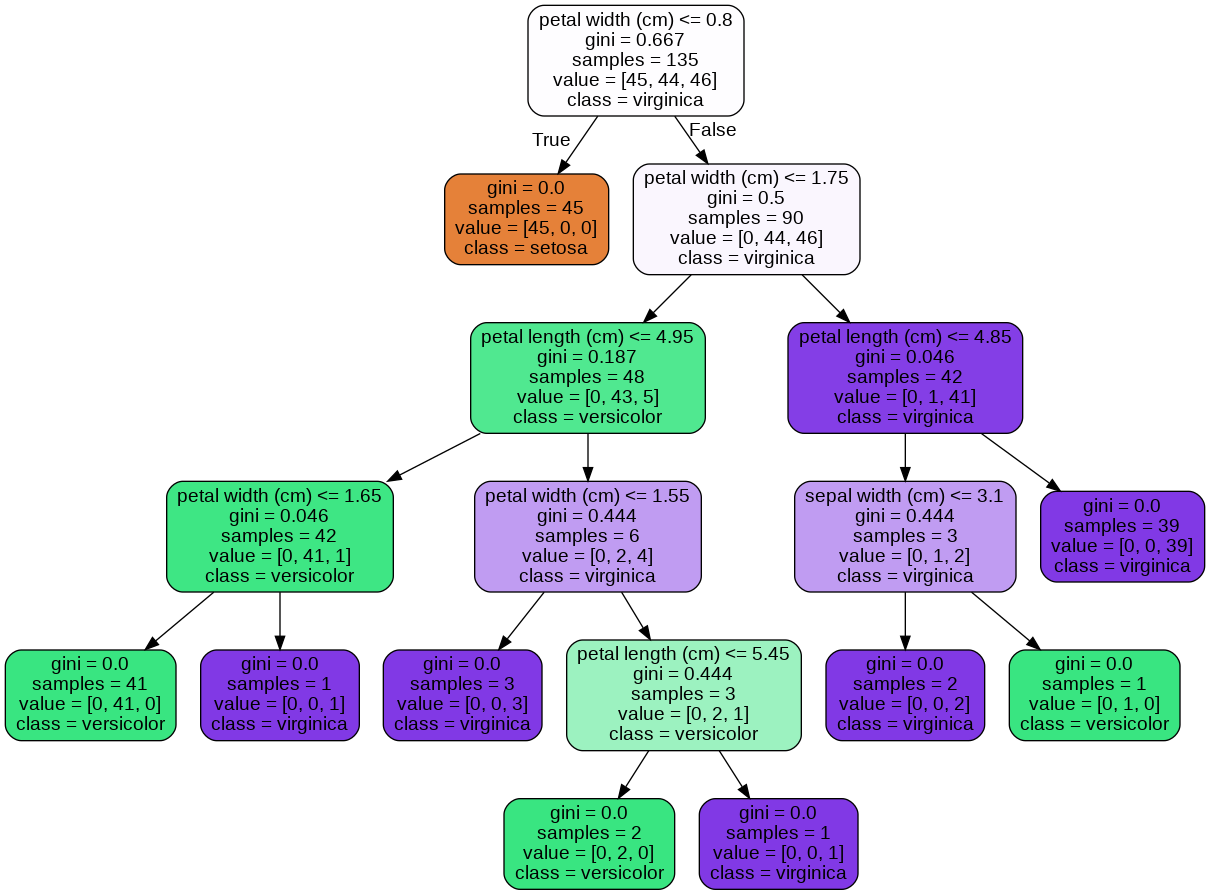

In [8]:
# Import libraries for graph visualizations
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz

export_graphviz(
        dtc,
        out_file="/content/drive/MyDrive/desision_tree.dot",
        feature_names=iris.feature_names[:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
)

(graph,) = pydot.graph_from_dot_file('/content/drive/MyDrive/desision_tree.dot')
graph.write_png('/content/drive/MyDrive/desision_tree.png')

Image(filename='/content/drive/MyDrive/desision_tree.png')